<FONT size = 7><B>Homework_2<B/></FONT>

<font face="TimesNewRoman" size = 5> Student ID : *********  <br>
Name : Yi-Kai Lee </font>

<font color=#D36010>Goal</font>: By drawing 3 graphs (such as <A HREF=https://ntpuccw.blog/python-in-learning/lesson-3-basic-math-and-statistics-computations/>website</A>), learn how to use loops and matrices <br>

<FONT size = 6>Ex0</FONT> <br>
這裡補充一些有使用到的工具或指令 <br>
* 小技巧 : 可以用 `.shape` 來查看該 array 或 list 的維度
*  <A HREF=https://www.runoob.com/matplotlib/matplotlib-marker.html>marker 參數參考</A>
* <A HREF=https://matplotlib.org/stable/gallery/color/named_colors.html#css-colors>color 的參數參考</A>

# Ex1
現在我們希望畫出這張圖 <br>

<img src = https://ntpuccw.files.wordpress.com/2021/10/array_proc_demo.jpg  width="820" HEIGHT="622" alt="Ex1" ALIGN=bottom> </img> <br>

備註 : 原始圖片大小為 (1727, 1312)，為求版面美觀調整成 (820, 622) <br>

下方我將會使用 2 種方式 <br>
for 以及 broadcasting <br>
然後為求方便我使用了 input <br>
這樣使用者可以更快的修改成自己喜歡的樣式 <br>
可以更改的內容如下 : <br>
1. 同心圓的數量
2. 每個同心圓的顏色
3. 每個同心圓上面標註的符號是甚麼樣式
4. 每個同心圓上面標註的符號是甚麼顏色


## for

輸入想畫出多少個同心圓 : 6
可使用的符號包含但不限於 : 
o -> 實心圓
. -> 點
s -> 正方形
* -> 星號
h -> 六邊形
D -> 菱形
輸入想標出甚麼樣式的符號 : s
下方輸入顏色時有這些注意事項 : 
1. 顏色由內而外輸入
2. 用空格分開
3. 如果懶得打可以直接用彩虹 -> 輸入 0 或是直接按 enter
4. 如果同心圓數大於給定的顏色列表時會一直重複
5. 如果同心圓數小給定的顏色列表時僅執行符合同心圓數的部分
輸入線條想要甚麼顏色 : 
輸入符號想要甚麼顏色 : 


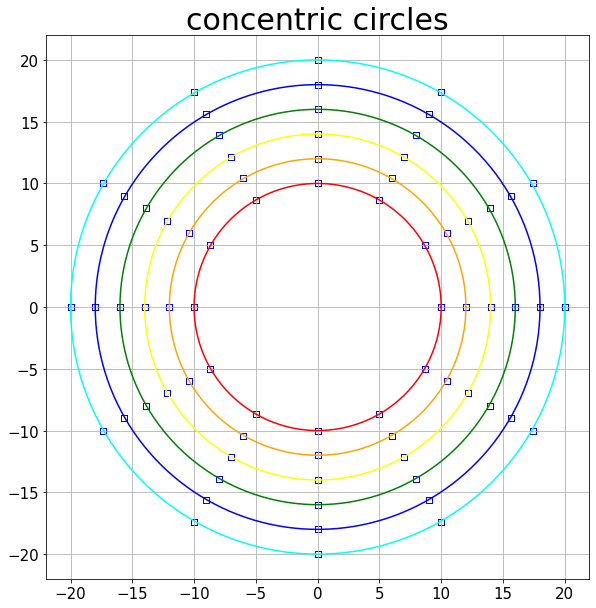

執行時間
執行時間為 : 0.2562558650970459


In [1]:
# ex1_for
import matplotlib.pyplot as plt
import numpy as np
import sys
import time
# define
original_color = ['red', 'orange', 'yellow', 'green',
                  'blue', 'cyan', 'purple']
# 定義 n 個同心圓
n = int(input("輸入想畫出多少個同心圓 : "))
if n <= 0:
    sys.exit("不可輸入 0 以下的值")
# 定義 marker 樣式
print("可使用的符號包含但不限於 : ")
print("o -> 實心圓")
print(". -> 點")
print("s -> 正方形")
print("* -> 星號")
print("h -> 六邊形")
print("D -> 菱形")
marker = input("輸入想標出甚麼樣式的符號 : ")
if marker == "0" or marker == "" or marker == " ":  # 避免有人傻了按到空格
    marker = "s"
# 定義顏色
print("下方輸入顏色時有這些注意事項 : ")
print("1. 顏色由內而外輸入")
print("2. 用空格分開")
print("3. 如果懶得打可以直接用彩虹 -> 輸入 0 或是直接按 enter")
print("4. 如果同心圓數大於給定的顏色列表時會一直重複")
print("5. 如果同心圓數小給定的顏色列表時僅執行符合同心圓數的部分")
color = input("輸入線條想要甚麼顏色 : ")
if color == "0" or color == "" or color == " ":  # 避免有人傻了按到空格
    color = original_color
else:
    color = color.split()

edgecolor = input("輸入符號想要甚麼顏色 : ")
if edgecolor == "0" or edgecolor == "" or edgecolor == " ":  # 避免有人傻了按到空格
    edgecolor = "b"
else:
    edgecolor = edgecolor.split()

# 開始測試執行時間
start = time.time()

# 定義剩下的東東
theta = np.linspace(0, np.pi * 2, 500)
length = len(color)
min_r = 10
max_r = 10 + 10 * ((n-1)/5)  # 根據n的值計算最大半徑
r = np.linspace(min_r, max_r, n)
gap = 30 # 每 30 度放一個 marker

# 調整圖
plt.figure(figsize=(15, 10))
ax = plt.gca()    # prepare ax
ax.set_aspect(1)    # square
plt.grid(True)

# plot
for index, i in enumerate(r):
    x = i * np.cos(theta)
    y = i * np.sin(theta)
    plt.plot(x, y, color=color[int(index) % length])
    for k in range(0, 360, gap):
        b = r*round(np.sin(k*np.pi/180), 2)
        a = r*round(np.cos(k*np.pi/180), 2)
        plt.scatter(a, b, label="point", marker=marker,
                    edgecolor=edgecolor, facecolor='none')

# show
plt.tick_params(labelsize=15)
plt.title("concentric circles", fontsize=30)
plt.show()

print("執行時間")
end = time.time()
print(f"執行時間為 : {end - start}")

## broadcasting

輸入想畫出多少個同心圓 : 6
可使用的符號包含但不限於 : 
o -> 實心圓
. -> 點
s -> 正方形
* -> 星號
h -> 六邊形
D -> 菱形
輸入想標出甚麼樣式的符號 : s
下方輸入顏色時有這些注意事項 : 
1. 顏色由內而外輸入
2. 用空格分開
3. 如果懶得打可以直接用彩虹 -> 輸入 0 或是直接按 enter
4. 如果同心圓數大於給定的顏色列表時會一直重複
輸入想要甚麼顏色 : 
輸入符號想要甚麼顏色 : 


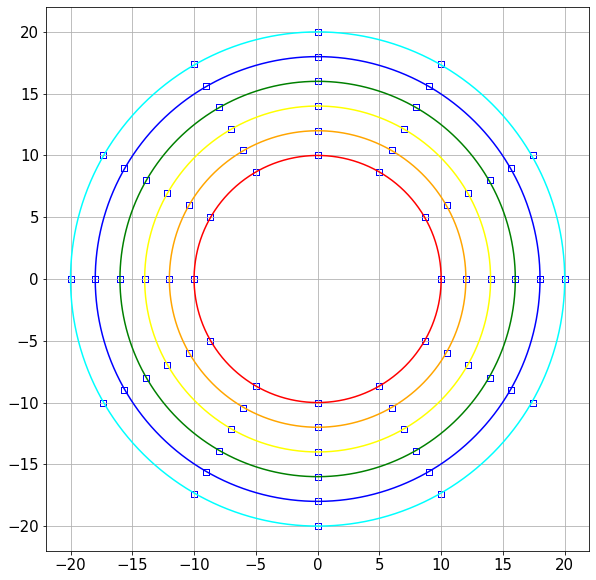

執行時間
執行時間為 : 0.10177731513977051


In [2]:
# ex1_broadcasting
import matplotlib.pyplot as plt
import numpy as np
import time
# define
original_color = ['red', 'orange', 'yellow', 'green',
                  'blue', 'cyan', 'purple']

# 定義 n 個同心圓
n = int(input("輸入想畫出多少個同心圓 : "))
if n <=0:
    sys.exit("不可輸入 0 以下的值")
# 定義 marker 樣式
print("可使用的符號包含但不限於 : ")
print("o -> 實心圓")
print(". -> 點")
print("s -> 正方形")
print("* -> 星號")
print("h -> 六邊形")
print("D -> 菱形")
marker = input("輸入想標出甚麼樣式的符號 : ")
if marker == "0" or marker == "" or marker == " ":  # 避免有人傻了按到空格
    marker = "s"
# 定義線條顏色
print("下方輸入顏色時有這些注意事項 : ")
print("1. 顏色由內而外輸入")
print("2. 用空格分開")
print("3. 如果懶得打可以直接用彩虹 -> 輸入 0 或是直接按 enter")
print("4. 如果同心圓數大於給定的顏色列表時會一直重複")
color = input("輸入想要甚麼顏色 : ")
if color == "0" or color == "" or color == " ": # 避免有人傻了按到空格
    color = original_color
else:
    color = color.split()
    
edgecolor = input("輸入符號想要甚麼顏色 : ")
if edgecolor == "0" or edgecolor == "" or edgecolor == " ": # 避免有人傻了按到空格
    edgecolor = "b"
else:
    edgecolor = edgecolor.split()
    
# 開始測試執行時間
start = time.time()

# 定義剩下的東東
theta = np.linspace(0, np.pi * 2, 1000)
k = np.linspace(0, 360, 13)    
length = len(color)
min_r = 10
max_r = 10 + 10 * ((n-1)/5)  # 根據n的值計算最大半徑
r = np.linspace(min_r, max_r, n)

# 計算 x , y 拿來畫出圓，sq_x , sq_y 拿來畫出上面的 marker
x = r.reshape(-1, 1) * np.cos(theta)
y = r.reshape(-1, 1) * np.sin(theta)
sq_x = r.reshape(-1, 1) * np.round(np.cos(k*np.pi/180), 2)
sq_y = r.reshape(-1, 1) * np.round(np.sin(k*np.pi/180), 2)

# 調整圖
plt.figure(figsize=(15, 10))
ax = plt.gca()    # prepare ax
ax.set_aspect(1)    # square
plt.grid(True)

# plot
# (這部分因為 2 個都是 2d，所以如果直接 plt.plot(x,y) 會導致各自有對應到，沒有 broadcasting 的效果)
for i in range(n):
    plt.plot(x[i], y[i], color=color[int(i) % length])
    plt.scatter(sq_x, sq_y, label="point", marker=marker,
                edgecolor=edgecolor, facecolor='none')

# show
plt.tick_params(labelsize=15)
plt.title("", fontsize=30)
plt.show()

print("執行時間")
end = time.time()
print(f"執行時間為 : {end - start}")

## Ex1 討論
比較兩者的運行時間我們可以發現其實 broadcasting 的執行效率高出很多 <br>
當輸入的 *同心圓數* 越大差異的時間也越多 <br>
當 *同心圓數* 為 100 時，兩者差距快 4 倍的時間

# Ex2
現在我們希望畫出這張圖 <br>

<img src = https://ntpuccw.files.wordpress.com/2021/10/loop_proj.png  width="740" HEIGHT="707" alt="Ex2" ALIGN=bottom> </img> <br>

備註 : 原始圖片大小為 (1028, 982)，為求版面美觀調整成 (740, 707) <br>

下方我將會使用 1 種方式 <br>
for + broadcasting <br>
然後為求方便我使用了 input <br>
這樣使用者可以更快的修改成自己喜歡的樣式 <br>
可以更改的內容如下 : <br>
1. 柱子的數量

## for + broadcasting

輸入想畫出多少柱子 : 8


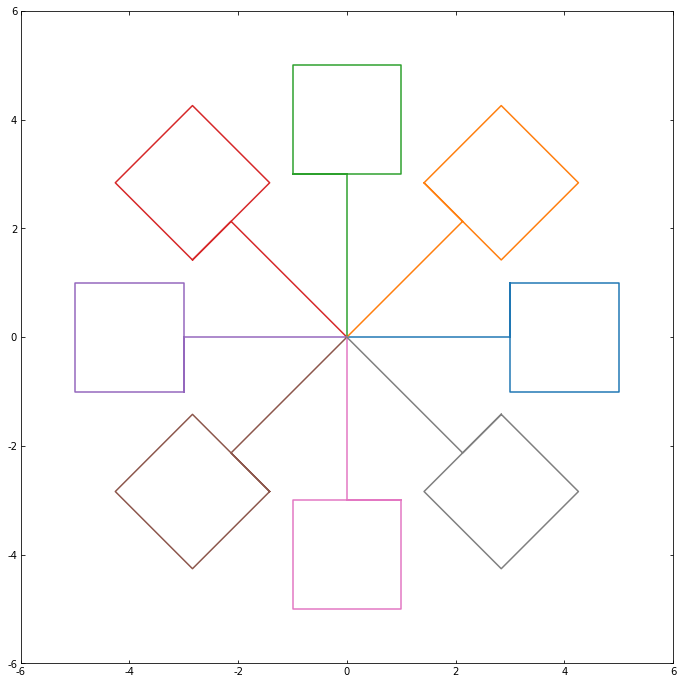

執行時間
執行時間為 : 0.08130955696105957


In [3]:
# 第二題
import matplotlib.pyplot as plt
import numpy as np
import time
# 定義 n 個同心圓
n = int(input("輸入想畫出多少柱子 : "))
if n <=0:
    sys.exit("不可輸入 0 以下的值")
    
# 開始測試執行時間
start = time.time()
    
# 調整圖
fig, ax = plt.subplots(figsize=[12, 12])
ax = plt.gca()    # prepare ax
ax.set_aspect(1)    # square
plt.grid(True, which="minor")

theta = np.around(np.linspace(0, 360, n + 1), 0) # +1 是因為 360度 = 0度

x_list = np.around(np.cos(theta * np.pi / 180), 2)  # 這是 cos，也就是 x 座標
y_list = np.around(np.sin(theta * np.pi / 180), 2)  # 這是 sin，也就是 y 座標

for i in range(n):
    x_in = 3 * x_list[i]
    y_in = 3 * y_list[i]
    x_out = 5 * x_list[i]
    y_out = 5 * y_list[i]

    # plot 中間的線(前 2 項) 正方形(後 5 項--因為給重複的起始點)
    # by 數學證明 : sin(90-k) = cos(k), cos(90-k) = sin(k)
    plt.plot([0, x_in, x_in - y_list[i], x_in + y_list[i], x_out + y_list[i], x_out - y_list[i], x_in - y_list[i]],
             [0, y_in, y_in + x_list[i], y_in - x_list[i], y_out - x_list[i], y_out + x_list[i], y_in + x_list[i]])


# 刻度
ax.set_xticks([-6, -4,  -2,  0,  2,  4, 6])
ax.set_xticklabels([-6, -4,  -2,  0,  2,  4, 6])
ax.set_yticks([-6, -4,  -2,  0,  2,  4, 6])
ax.set_yticklabels([-6, -4,  -2,  0,  2,  4, 6])
# 刻度朝內，上、右不出現
ax.tick_params(direction='in', top=True, right=True)

plt.show()

print("執行時間")
end = time.time()
print(f"執行時間為 : {end - start}")

## Ex2 討論
從運行時間我們可以發現其實 for + broadcasting 的執行效率也是很高 <br>
當輸入的 *同心圓數* 越大差異的時間也越多 <br>
當 *數量* 為 8 時，也才花不到 0.08 秒 <br>
當 *數量* 為 2048 時，也才花不到 1.5 秒 <br>
<br>
但我發現我對於 broadcasting 的掌握還不夠熟悉，因為還是被迫使用到 for 來進行運算 <br>
希望能藉由參考其他同學的作品來學習到更厲害的寫法

# Ex3
計算卡方右尾面積與自由度對照表，並輸出到 EXCEL 檔，檔名為：Chi2Table.xlsx，含欄與列的名稱

<img src = https://ntpuccw.files.wordpress.com/2021/10/save_to_excel-1.png  width="820" HEIGHT="400" alt="Ex3" ALIGN=bottom> </img> <br>

備註 : 原始圖片大小為 (2097, 1023)，為求版面美觀調整成 (820, 400) <br>

下方我將會使用 2 種方式 <br>
for 以及 broadcasting <br>

## for

In [8]:
import pandas as pd
import numpy as np
from scipy.stats import chi2
import time
# 開始測試執行時間
start = time.time()

upper_tail = [0.995, 0.99, 0.975, 0.95, 0.9, 0.1, 0.05, 0.025, 0.01, 0.005]
df_val = np.arange(1, 30)
val = []  # 儲存 chi值

for i in upper_tail:
    x = chi2.ppf((1 - i), df_val)  # 計算值
    val.append(x.round(7))  # 弄到小數點後 7 位並且紀錄

chi_df = pd.DataFrame(val, columns=df_val, index=upper_tail)  # 弄成 table

chi_df.T.to_excel("Chi2Table.xlsx")  # 存到excel / .T 是為了轉 df 而已
display(chi_df.T.head()) # 在 python 中查看(可有可無)
print("執行時間")
end = time.time()
print(f"執行時間為 : {end - start}")

,0.995,0.990,0.975,0.950,0.900,0.100,0.050,0.025,0.010,0.005
1,0.000039,0.000157,0.000982,0.003932,0.015791,2.705544,3.841459,5.023886,6.634897,7.879439
2,0.010025,0.020101,0.050636,0.102587,0.210721,4.605170,5.991465,7.377759,9.210340,10.596635
3,0.071722,0.114832,0.215795,0.351846,0.584374,6.251389,7.814728,9.348404,11.344867,12.838157
4,0.206989,0.297110,0.484419,0.710723,1.063623,7.779440,9.487729,11.143287,13.276704,14.860259
5,0.411742,0.554298,0.831212,1.145476,1.610308,9.236357,11.070498,12.832502,15.086272,16.749602


執行時間
執行時間為 : 0.04359889030456543


## broadcasting

In [7]:
import pandas as pd
import numpy as np
from scipy.stats import chi2
import time
# 開始測試執行時間
start = time.time()

upper_tail = [0.995, 0.99, 0.975, 0.95, 0.9, 0.1, 0.05, 0.025, 0.01, 0.005]
df_val = np.arange(1, 30)

val = chi2.ppf((1 - np.array(upper_tail))[:, np.newaxis], df_val) # 計算值 / [:, np.newaxis] 是轉成行

chi_df = pd.DataFrame(val.round(7), columns=df_val,
                      index=upper_tail)  # 弄成 table

chi_df.T.to_excel("Chi2Table.xlsx")  # 存到excel / .T 是為了轉 df 的行列而已

display(chi_df.T.head()) # 在 python 中查看(可有可無)
# 如果這樣做最後就不用轉行列了(因為先轉成[29, 10])
# val = chi2.ppf((1 - np.array(upper_tail)), df_val[:, np.newaxis])
# chi_df = pd.DataFrame(val.round(7), columns=upper_tail, index=df_val)
# chi_df.to_excel("Chi2Table.xlsx")
# chi_df 

print("執行時間")
end = time.time()
print(f"執行時間為 : {end - start}")

,0.995,0.990,0.975,0.950,0.900,0.100,0.050,0.025,0.010,0.005
1,0.000039,0.000157,0.000982,0.003932,0.015791,2.705544,3.841459,5.023886,6.634897,7.879439
2,0.010025,0.020101,0.050636,0.102587,0.210721,4.605170,5.991465,7.377759,9.210340,10.596635
3,0.071722,0.114832,0.215795,0.351846,0.584374,6.251389,7.814728,9.348404,11.344867,12.838157
4,0.206989,0.297110,0.484419,0.710723,1.063623,7.779440,9.487729,11.143287,13.276704,14.860259
5,0.411742,0.554298,0.831212,1.145476,1.610308,9.236357,11.070498,12.832502,15.086272,16.749602


執行時間
執行時間為 : 0.043112993240356445


## 補充(自訂 df, upper tail 輸出圖形)

下方我將會使用 1 種方式 <br>
broadcasting <br>
並且為求方便我使用了 input <br>
這樣使用者可以更快的修改成自己喜歡的樣式 <br>
可以更改的內容如下 : <br>
1. df 值
2. alpha 值

輸入 df 值 : 10
輸入 alpha 值 : 0.01


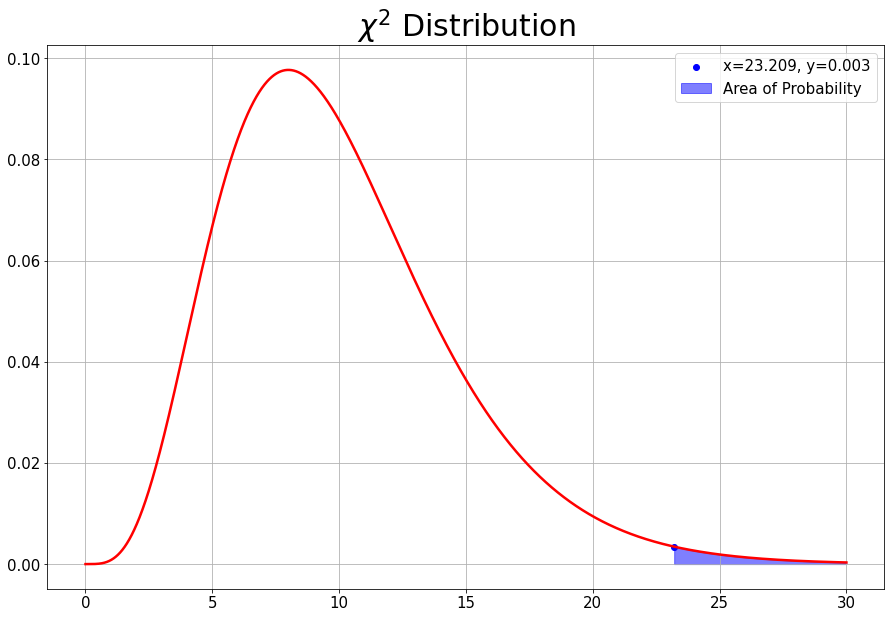

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
import sys

# 先定義出 f(x) 以及 g(x)，方便後續上色
# f(x) 是做出 chi 的圖形
def f(x, df):
    return chi2.pdf(x, df)
# g(x) 是把右側都上色，返回 1, 0 是為了區別是否上色
def g(x, x2):
    return np.where(x >= x2, 1, 0)

# 給定 df, alpha
# df
df = int(input("輸入 df 值 : "))
if df > 30 :
    sys.exit("不可輸入 29 以上的值")
elif df <= 0:
    sys.exit("不可輸入 0 以下的值")
# alpha
alpha = float(input("輸入 alpha 值 : "))
if alpha > 0.995 :
    sys.exit("0.995 以上的值太大，沒有意義，請輸入合理數值")
elif alpha <= 0:
    sys.exit("0.005 以上的值太小，沒有意義，請輸入合理數值")
else:
    alpha = 1 - alpha

# 設定參數
# 為了使圖形美觀，增加區間
max_x = 20 if df <= 5 else 30 if df <= 10 else 40 if df <= 15else 45 if df <= 20 else 50 if df <= 25 else 60
xlim = [0, max_x] # 當 df 在 29 內時，x 值都會處在 55 之內
x = np.linspace(xlim[0], xlim[1], 10000)

# 計算y2對應的x值
x2 = chi2.ppf(alpha, df)
y2 = chi2.pdf(x2, df)

# 繪製圖形
# 先做出卡方圖
plt.figure(figsize=(15, 10))
plt.plot(x, f(x, df), color="red", linewidth=2.5)
plt.grid(True)
plt.title(r"$\chi^2$ Distribution", fontsize=30)

# 標出計算出來的點
plt.scatter(x2, y2, color='blue', marker='o', label=f'x={x2:.3f}, y={y2:.3f}')

# 上色
fill_x = np.linspace(x2, xlim[1], 10000)
fill_y = np.minimum(f(fill_x, df), g(fill_x, x2))
plt.fill_between(fill_x, 0, fill_y, color='blue', alpha=0.5, label='Area of Probability')
plt.tick_params(labelsize=15)
plt.legend(fontsize=15)
plt.show()


## Ex3 討論
比較兩者的運行時間我們可以發現其實 broadcasting 的執行效率高出一些(因為資料量小) <br>
<br>
在寫這題時覺得使用 brodacasting 比較直觀<br>
而且因為只是制表而不是畫圖因此我覺得寫起來比較得心應手(制表時行列的數字都是給定的、畫圖還需要特別想以及應用到數學)<br>
然後在 broadcasting 的地方還有註解(註解比較快而且直觀--為了對照 for 才沒有把註解的地方當成實際執行的)